In [8]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon
from multiprocessing import Pool

In [2]:
gras_hoog = 88344.58,470583.41
bos = 88400.32,470192.25
zand_hoog = 88201.79,470359.72
gras_laag = 88069.32,470126.55
zand_laag = 87639.78, 469946.24

In [3]:
def func_cor_square(input_x_y):

        rect = [round(input_x_y[0]/2)*2, round(input_x_y[1]/2)*2, 0, 0]
        rect[2], rect[3] = rect[0] + 2, rect[1] + 2
        coords = Polygon([(rect[0], rect[1]), (rect[2], rect[1]), (rect[2], rect[3]), (rect[0], rect[3]), (rect[0], rect[1])])
        return coords

In [24]:
class_cor_0 = [gras_hoog[0],bos[0] ,zand_hoog[0], gras_laag[0], zand_laag[0] ]
class_cor_1 = [gras_hoog[0],bos[1] ,zand_hoog[1], gras_laag[1], zand_laag[1] ]

In [25]:
class_name = ["gras_hoog","bos","zand_hoog","gras_laag","zand_laag"]

In [26]:
df = pd.DataFrame([class_cor_0,class_cor_1,class_name]).T

In [27]:
df

,0,1,2
0,88344.58,88344.58,gras_hoog
1,88400.32,470192.25,bos
2,88201.79,470359.72,zand_hoog
3,88069.32,470126.55,gras_laag
4,87639.78,469946.24,zand_laag


In [9]:
p = Pool()

In [ ]:
p.map(func_cor_square, df[[0,1]].to_numpy())

In [21]:
df['both'] = df[[0,1]].to_numpy()[0]

ValueError: Length of values (2) does not match length of index (5)

In [7]:
df.swifter.apply(lambda x:print(x[0]))

0    (88344.58, 470583.41)
1    (88400.32, 470192.25)
2    (88201.79, 470359.72)
3    (88069.32, 470126.55)
4    (87639.78, 469946.24)
Name: 0, dtype: object


TypeError: <lambda>() got an unexpected keyword argument 'broadcast'

In [67]:
df[0]

0    (88344.58, 470583.41)
1    (88400.32, 470192.25)
2    (88201.79, 470359.72)
3    (88069.32, 470126.55)
4    (87639.78, 469946.24)
Name: 0, dtype: object

In [32]:
aarray = []
for i, seg in enumerate(class_cor):
        rect = [round(seg[0]/2)*2, round(seg[1]/2)*2, 0, 0]
        rect[2], rect[3] = rect[0] + 2, rect[1] + 2
        coords = Polygon([(rect[0], rect[1]), (rect[2], rect[1]), (rect[2], rect[3]), (rect[0], rect[3]), (rect[0], rect[1])])
        aarray.append([class_name[i],coords ])

In [33]:
df = pd.DataFrame(aarray, columns = ['label',"geometry"])

In [34]:
df = gpd.GeoDataFrame(df,crs="EPSG:28992")

In [35]:
df.set_geometry(df.geometry)

,label,geometry
0,gras_hoog,"POLYGON ((88344.000 470584.000, 88346.000 4705..."
1,bos,"POLYGON ((88400.000 470192.000, 88402.000 4701..."
2,zand_hoog,"POLYGON ((88202.000 470360.000, 88204.000 4703..."
3,gras_laag,"POLYGON ((88070.000 470126.000, 88072.000 4701..."
4,zand_laag,"POLYGON ((87640.000 469946.000, 87642.000 4699..."


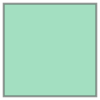

In [45]:
df[1:2]['geometry'][1]